# Linear Regressions and Logistic Regressions

> A Summary of lecture "Linear Regressions & Logistic Regressions in Python", via datacamp

- toc: true 
- badges: true
- comments: true

For now, limited to 1 explanatory (independent) variable to explain the response (numeric or categorical/logical)

Which one is the response variable?
Regression lets you predict the values of a response variable from known values of explanatory variables. Which variable you use as the response variable depends on the question you are trying to answer, but in many datasets there will be an obvious choice for variables that would be interesting to predict. Over the next few exercises, you'll explore a Taiwan real estate dataset with four variables.

Variable	Meaning
dist_to_mrt_station_m	Distance to nearest MRT metro station, in meters.
n_convenience	No. of convenience stores in walking distance.
house_age_years	The age of the house, in years, in three groups.
price_twd_msq	House price per unit area, in New Taiwan dollars per meter squared.
Print taiwan_real_estate in the console to view the dataset, and decide which variable would make a good response variable.

### Visualizing two numeric variables
Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

taiwan_real_estate is available as a pandas DataFrame.

- Processing data

In [47]:
import pandas as pd
import sys, os
import seaborn as sns

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/_data'
os.chdir(path)
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
print(taiwan_real_estate.head())

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


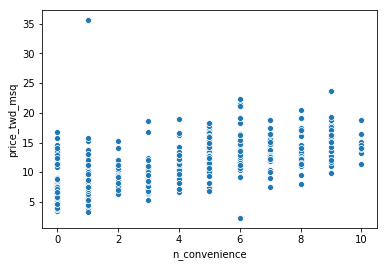

In [48]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Plot it
plt.show()

### Visualizing two numeric variables
Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

taiwan_real_estate is available as a pandas DataFrame.

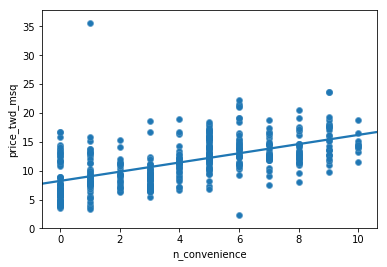

In [49]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of n_convenience vs. price_twd_msq
sns.regplot(x="n_convenience", 
y="price_twd_msq",
         data=taiwan_real_estate,
         ci=False,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

Scatter plots are the standard way to visualize the relationship between two numeric variables, and seaborn makes adding linear trend lines easy.

### Linear regression with ols()

While sns.regplot() can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.

Time to run your first model!

taiwan_real_estate is available. TWD is an abbreviation for Taiwan dollars.

In addition, for this exercise and the remainder of the course, the following packages will be imported and aliased if necessary: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

In [50]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


#### Question
The model had an Intercept coefficient of 8.2242. What does this mean?
On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.

The model had an n_convenience coefficient of 0.7981. What does this mean?
If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.

The intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house.

### Visualizing numeric vs. categorical

If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

taiwan_real_estate is available.

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


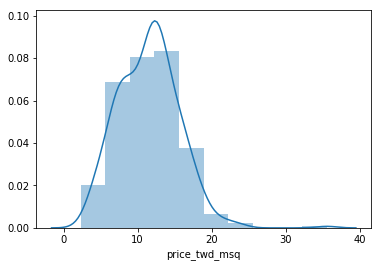

In [51]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
print(taiwan_real_estate.head())

sns.distplot(taiwan_real_estate['price_twd_msq'],
             color = None, #can insert here any categorical to facet~
             bins = 10)

# Show the plot
plt.show()

 It appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest.

### Calculating means by category

A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. As such, you can compare each category in more detail.

Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help you understand the output of a linear regression with a categorical variable.

taiwan_real_estate is available as a pandas DataFrame.

In [52]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


### Linear regression with a categorical explanatory variable

Great job calculating those grouped means! As mentioned in the last video, the means of each category will also be the coefficients of a linear regression model with one categorical variable. You'll prove that in this exercise.

To run a linear regression model with categorical explanatory variables, you can just use the same code as with numeric explanatory variables. The coefficients returned by the model are different however. Here you'll run a linear regression on the Taiwan real estate dataset.

taiwan_real_estate is available and the ols() function is also loaded.

In [53]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq~house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [54]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years +0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


The coefficients of the model are just the means of each category you calculated previously. Fantastic job!

### Predicting house prices

Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and you get a prediction for the corresponding response variable. The code flow is as follows.

``
explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})
predictions = model.predict(explanatory_data)
prediction_data = explanatory_data.assign(response_var=predictions)
``

Here, you'll make predictions for the house prices in the Taiwan real estate dataset.

taiwan_real_estate is available. The fitted linear regression model of house price versus number of convenience stores is available as mdl_price_vs_conv. For future exercises, when a model is available, it will also be fitted.

In [55]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035
